# Описание проекта

Я аналитик в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Используя данные 2016 года, предскажем тренды и спланируем рекламные кампании на 2017 год.

<h3>Описание данных:</h3>

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<h3>В дополнение к данным:</h3>
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Импортируем библиотеки

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats as st
import seaborn as sns

# Шаг 1. Считывание файла.

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
data.shape

(16715, 11)

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# Шаг 2. Предобработка данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Приведем названия столбцов к нижнему регистру

In [5]:
data.columns = data.columns.str.lower()

<h2>Обработка пропусков</h3>

In [6]:
data.isnull().sum()

,0
name,2
platform,0
year_of_release,269
genre,2
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8578
user_score,6701


Заполнить имя и жанр игры, зная остальные данные маловероятно.

Заполнить год выпуска можно, используя стороннюю информацию.

Оценку критиков, пользователей и рейтинг от организации ESRB можно попытаться узнать с сайта организации ESRB.

In [7]:
# data['year_of_release'] = data['year_of_release'].fillna(-1).astype(int)

In [8]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце `user_score` замечено нехарактерное значение `tbd`, не являющееся ни пропуском, ни оценкой от пользователей.

Эта аббревиатура расшифровывается, как **To Be Determined**, что означает: будет определено. Таким образом, `tbd` означает, что информации об оценке нет. Приравняем `tbd` к пропуску и изменим тип данных столбца `user_score` на `float`.

In [9]:
data['user_score'] = data['user_score'].where(data['user_score']!='tbd', 'NaN').astype(float)

Причинами пропусков в рейтингах могут быть:
* Технические проблемы
* Слишком мало оценок, чтобы поставить рейтинг, т.к. игра непопулярная
* Слишком мало оценок, чтобы поставить рейтинг, т.к. игра новая

<h2>Обработка дубликатов</h2>

In [10]:
data.duplicated().sum()

0

Полных дубликатов нет. Единственный столбец, где не должно быть повторений - `name`, проверим его, вдруг данные были взяты в разные промежутки времени.

In [11]:
data['name'].duplicated().sum()

5155

Дубликатов слишком много, видимо мы что-то не учли. Посмотрим подробнее.

In [12]:
data[data['name'].duplicated(False)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3862,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
3358,Frozen: Olaf's Quest,3DS,2013.0,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
14658,007: Quantum of Solace,PC,2008.0,Action,0.01,0.01,0.00,0.00,70.0,6.3,T
9507,007: Quantum of Solace,DS,2008.0,Action,0.11,0.01,0.00,0.01,65.0,NaN,T
3120,007: Quantum of Solace,Wii,2008.0,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
...,...,...,...,...,...,...,...,...,...,...,...
12648,pro evolution soccer 2011,PC,2010.0,Sports,0.00,0.05,0.00,0.01,79.0,NaN,NaN
15612,uDraw Studio: Instant Artist,X360,2011.0,Misc,0.01,0.01,0.00,0.00,54.0,5.7,E
8280,uDraw Studio: Instant Artist,Wii,2011.0,Misc,0.06,0.09,0.00,0.02,NaN,NaN,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN


Мы не учли, что одна и та же игра может быть на разных платформах.

Осталось проверить, что нет одновременных дубликатов и названия игры, и платформы.

In [13]:
data[['name', 'platform']].duplicated().sum()

5

Такие дубликаты есть. Посмотрим на них.

In [14]:
data[data[['name', 'platform']].duplicated(keep=False)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Подтвердились главные опасения, несколько игр присутствуют в данных несколько раз.
При этом есть одна игра, которая имеет 2 различных года выпуска:
> Need for Speed: Most Wanted

Изучив информацию на сторонних сайтах, можно сказать, что эти игры 2005 и 2012 года являются различными, а игра 2012 года называется "Need for Speed: Most Wanted 2012". Переименуем это вручную.

In [15]:
data.loc[1190,'name'] = "Need for Speed: Most Wanted 2012"
data.loc[11715,'name'] = "Need for Speed: Most Wanted 2012"

Обнаружим, что в остальном все рейтинги, жанры и год выпуска совпадают, но отличаются продажи, при чем продажи не пересекаются. Можно предположить, что для этих игр были отдельно посчитаны продажи в разных регионах.

Сгруппируем данные по названию, платформе и году релиза и посчитаем сумму продаж.

In [16]:
good_data = data.pivot_table(
    index=['name','platform'],
    values=['year_of_release',	'genre',	'na_sales',	'eu_sales',
            'jp_sales',	'other_sales',	'critic_score',	'user_score',	'rating'],
    aggfunc={'year_of_release':'max',	'genre':'last',	'na_sales':'sum',
             'eu_sales':'sum',	'jp_sales':'sum',	'other_sales':'sum',
             'critic_score':'last',	'user_score':'last',	'rating':'last'})
good_data = good_data.reset_index()
good_data

,name,platform,critic_score,eu_sales,genre,jp_sales,na_sales,other_sales,rating,user_score,year_of_release
0,Beyblade Burst,3DS,NaN,0.00,Role-Playing,0.03,0.00,0.00,None,NaN,2016.0
1,Fire Emblem Fates,3DS,NaN,0.23,Role-Playing,0.52,0.81,0.11,None,NaN,2015.0
2,Frozen: Olaf's Quest,3DS,NaN,0.27,Platform,0.00,0.27,0.05,None,NaN,2013.0
3,Frozen: Olaf's Quest,DS,NaN,0.26,Platform,0.00,0.21,0.04,None,NaN,2013.0
4,Haikyu!! Cross Team Match!,3DS,NaN,0.00,Adventure,0.04,0.00,0.00,None,NaN,2016.0
...,...,...,...,...,...,...,...,...,...,...,...
16706,uDraw Studio,Wii,71.0,0.57,Misc,0.00,1.65,0.20,E,NaN,2010.0
16707,uDraw Studio: Instant Artist,Wii,NaN,0.09,Misc,0.00,0.06,0.02,E,NaN,2011.0
16708,uDraw Studio: Instant Artist,X360,54.0,0.01,Misc,0.00,0.01,0.00,E,5.7,2011.0
16709,wwe Smackdown vs. Raw 2006,PS2,NaN,1.02,Fighting,0.00,1.57,0.41,None,NaN,NaN


<h3>Посчитаем суммарные продажи во всех регионах и запишем их в столбец <code>total_sales</code>.</h3>

In [17]:
good_data.loc[:,'total_sales'] = good_data['jp_sales'] + good_data['na_sales'] + good_data['other_sales'] + good_data['eu_sales']
good_data.head()

,name,platform,critic_score,eu_sales,genre,jp_sales,na_sales,other_sales,rating,user_score,year_of_release,total_sales
0,Beyblade Burst,3DS,NaN,0.00,Role-Playing,0.03,0.00,0.00,None,NaN,2016.0,0.03
1,Fire Emblem Fates,3DS,NaN,0.23,Role-Playing,0.52,0.81,0.11,None,NaN,2015.0,1.67
2,Frozen: Olaf's Quest,3DS,NaN,0.27,Platform,0.00,0.27,0.05,None,NaN,2013.0,0.59
3,Frozen: Olaf's Quest,DS,NaN,0.26,Platform,0.00,0.21,0.04,None,NaN,2013.0,0.51
4,Haikyu!! Cross Team Match!,3DS,NaN,0.00,Adventure,0.04,0.00,0.00,None,NaN,2016.0,0.04


# Шаг 3. Исследовательский анализ данных.

<h3>Посмотрим, сколько игр выпускалось в разные годы. </h3>

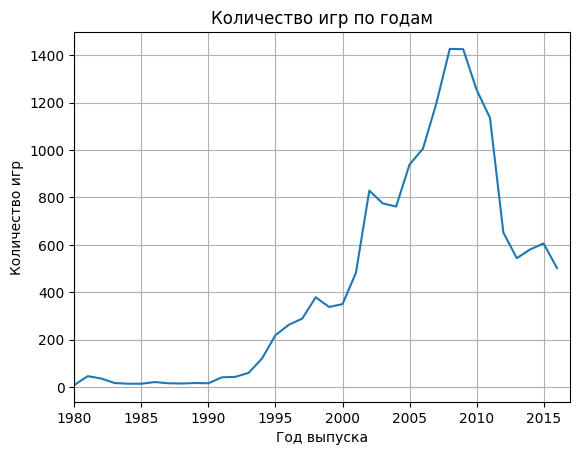

In [18]:
good_data.pivot_table(index='year_of_release', aggfunc={'name':'count'}).plot(legend=False)
plt.xlim(1980,2017)
plt.ylabel('Количество игр')
plt.xlabel('Год выпуска')
plt.title('Количество игр по годам')
plt.grid()
plt.show()

Виден пик в конце 2000-х годов. До 2000 года игр производилось достаточно мало или они были не так распространенны. Из сторонних знаний по теме, можно констатировать: производительные возможности игр 20 века не терпят конкуренции против игр 21 века.
В анализе важность представляют только данные за последние годы, поэтому данные до 2000 года рассматривать смысла нет.

In [19]:
good_data = good_data.query('year_of_release>=2000')

<h3>Посмотрим, как менялись продажи в зависимости от платформ.</h3>

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами, построим распределение по годам и поймем, за какой характерный срок появляются новые и исчезают старые платформы.


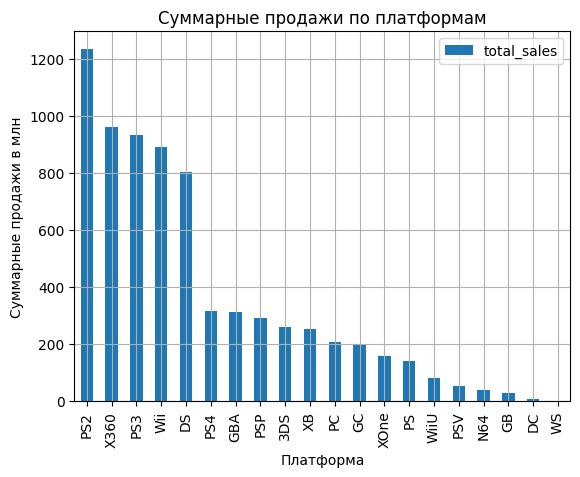

In [20]:
good_data.pivot_table(index=['platform'], aggfunc={'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).plot(kind='bar')
plt.grid()
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи в млн')
plt.title('Суммарные продажи по платформам')
plt.show()

Наиболее полулярными платформами за всё время стали:
1. PS2
2. X360
3. PS3
4. Wii
5. DS

Построим распределение по годам.

In [21]:
popular_platforms_after_2000 = (
    good_data.pivot_table(index=['platform'], aggfunc={'total_sales':'sum'})
    .sort_values(by='total_sales', ascending=False)[:5] )
popular_platforms_after_2000

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.82
Wii,891.18
DS,802.76


In [22]:
sales_by_platform_by_year = good_data.pivot_table(index=['platform','year_of_release'],  aggfunc={'total_sales':['sum','count']}).reset_index(level=1).query('index in @popular_platforms_after_2000.index')
sales_by_platform_by_year.columns = ['year_of_release', 'total_games_released', 'total_sales']
sales_by_platform_by_year.head()

,year_of_release,total_games_released,total_sales
platform,,,
DS,2004.0,23,17.27
DS,2005.0,118,130.14
DS,2006.0,201,119.81
DS,2007.0,376,146.94
DS,2008.0,492,145.31


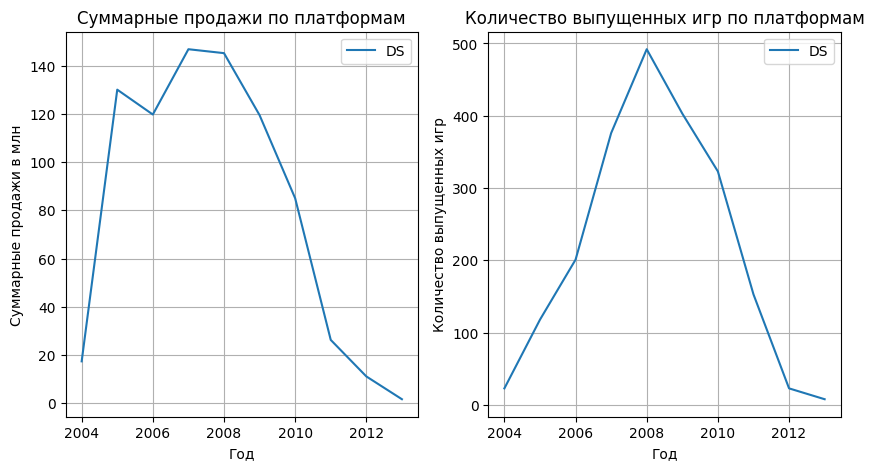

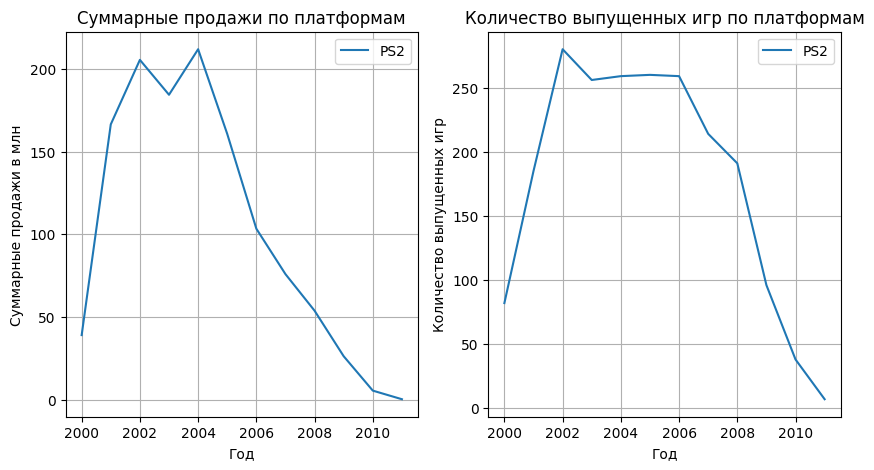

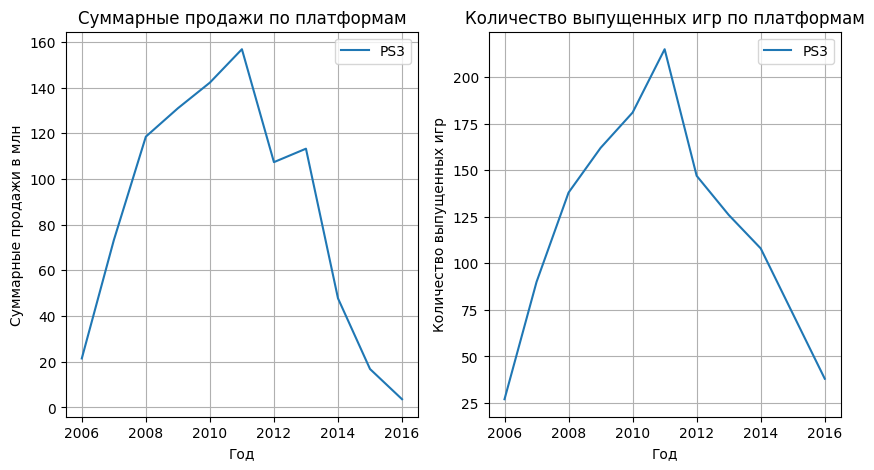

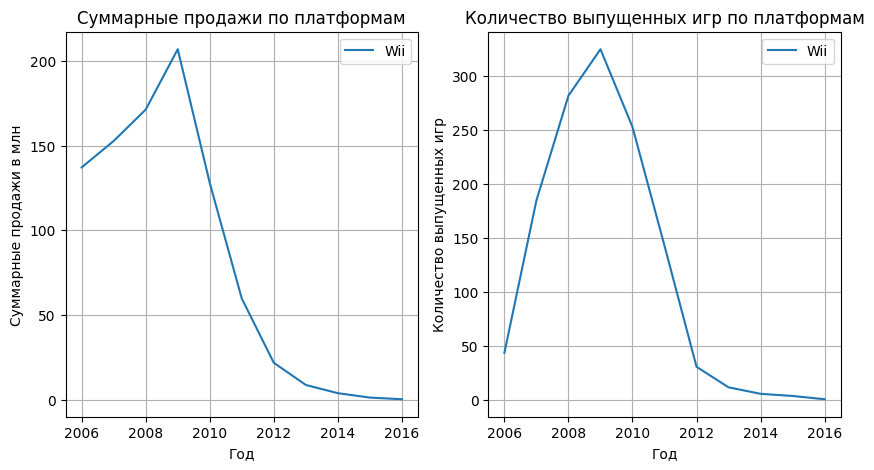

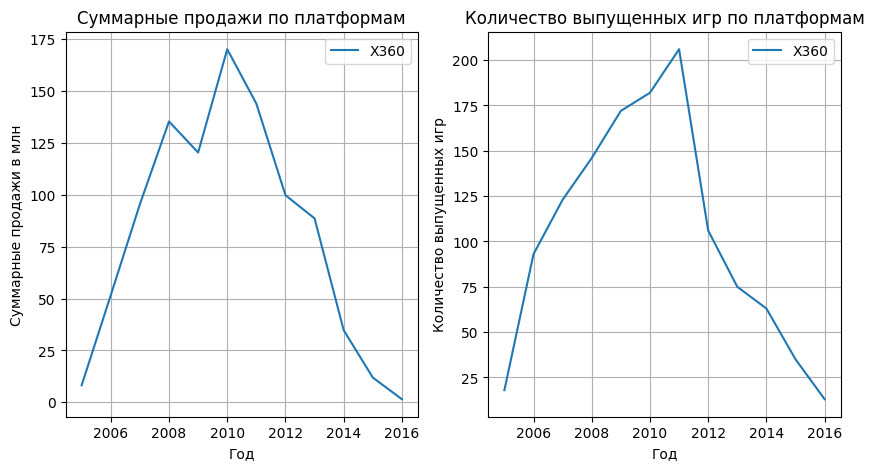

In [23]:
for name_platform in sales_by_platform_by_year.index.unique():
  b = sales_by_platform_by_year.query('platform == @name_platform')
  ax = plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.plot(b['year_of_release'], b['total_sales'], label=name_platform)
  plt.legend()
  plt.xlabel('Год')
  plt.ylabel('Суммарные продажи в млн')
  plt.title('Суммарные продажи по платформам')
  plt.grid()
  plt.subplot(1,2,2)
  plt.plot(b['year_of_release'], b['total_games_released'], label=name_platform)
  plt.legend()
  plt.xlabel('Год')
  plt.ylabel('Количество выпущенных игр')
  plt.title('Количество выпущенных игр по платформам')
  plt.grid()
  plt.show()

Можно заметить, что практически все попуряные платформы 21 века имеют одинаковые графики: резкий взлёт, пик, падение.

В среднем, от первоначального взлёта до падения проходит около 10 лет, а от взлёта до пика проходит около 5 лет.

Первое наблюдение можно интерпретировать так: за 10 лет происходит значительный прогресс в области разработки консолей и игр, поэтому 10-летние консоли устаревают и проигрывают конкуренцию

Пик через 5 лет можно объяснить тем, что Разработка игр, покупку пользователем необходимой платформы происходит не быстро и в среднем, видимо, занимает 5 лет.

Для построения прогноза на 2017 год, необходимо взять для анализа только актуальные данные.
Так как пик популярности консоли приходится примерно через 5 лет после её появления, то для прогноза на 2017 год будем брать данные не позже 2012 года

In [24]:
good_data = good_data.query('year_of_release>=2012')
good_data.shape[0]/data.shape[0]

0.17259946156147174

Осталось всего 17% от изначальной информации, зато все данные являются актуальными.

In [25]:
good_data['year_of_release'] = good_data['year_of_release'].astype(int)

<ipython-input-25-9c5a76b9a5b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data['year_of_release'] = good_data['year_of_release'].astype(int)


Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

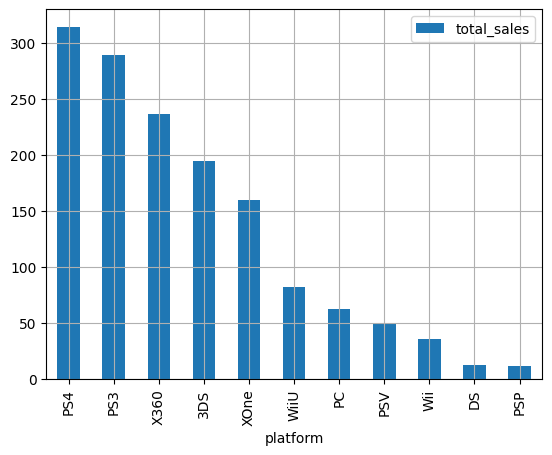

In [26]:
good_data.pivot_table(index=['platform'], aggfunc={'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).plot(kind='bar')
plt.grid()
plt.show()

In [27]:
popular_platforms_after_2017 = (
    good_data.pivot_table(index=['platform'], aggfunc={'total_sales':'sum'})
    .sort_values(by='total_sales', ascending=False) )
popular_platforms_after_2017

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


In [28]:
sales_by_platform_by_year = good_data.pivot_table(index=['platform','year_of_release'],  aggfunc={'total_sales':['sum','count']}).reset_index(level=1).query('index in @popular_platforms_after_2017.index')
sales_by_platform_by_year.columns = ['year_of_release', 'total_games_released', 'total_sales']
sales_by_platform_by_year.head()

,year_of_release,total_games_released,total_sales
platform,,,
3DS,2012,93,51.36
3DS,2013,91,56.57
3DS,2014,80,43.76
3DS,2015,86,27.78
3DS,2016,46,15.14


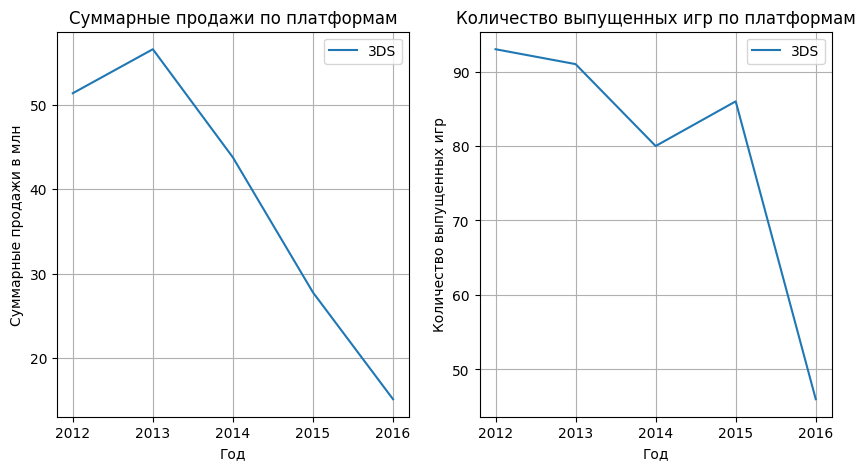

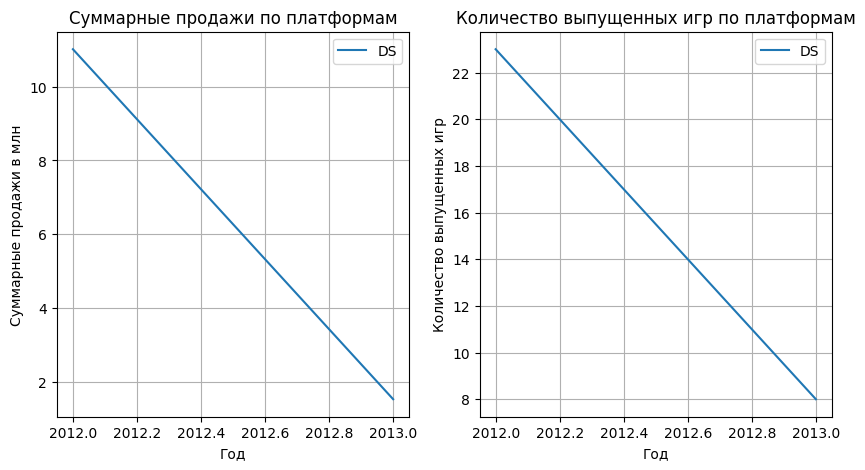

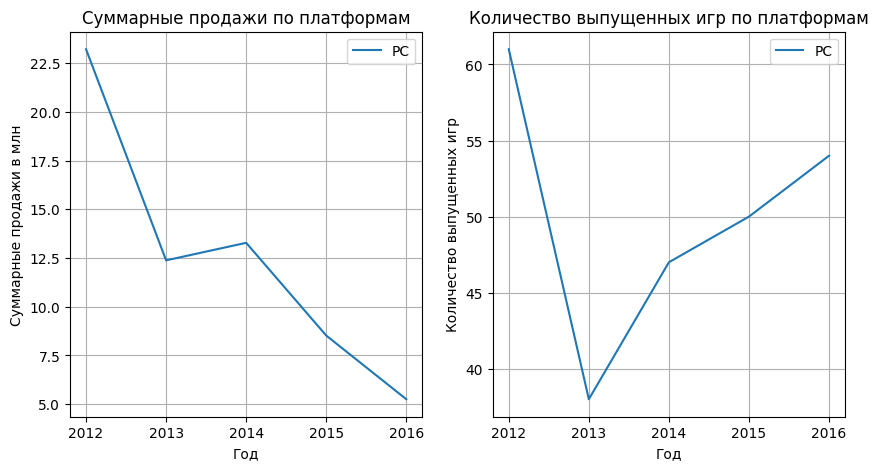

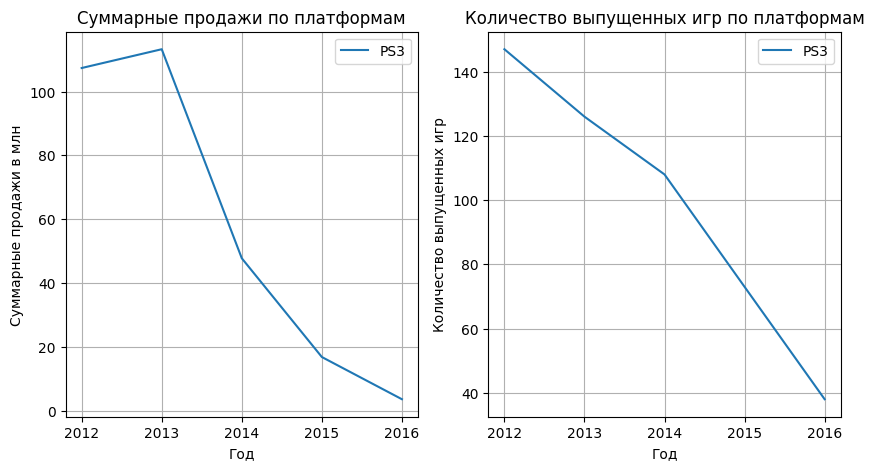

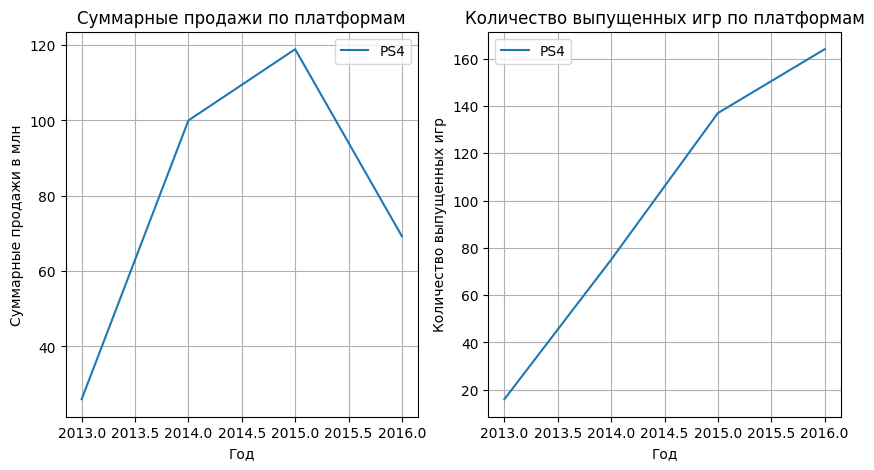

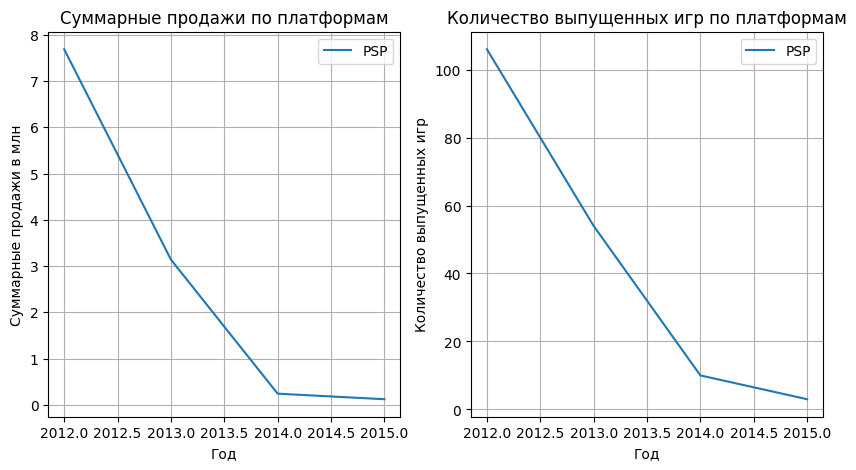

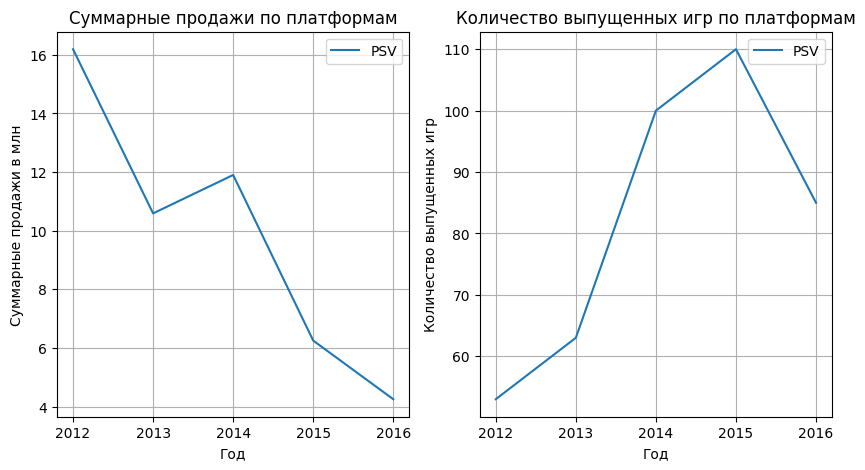

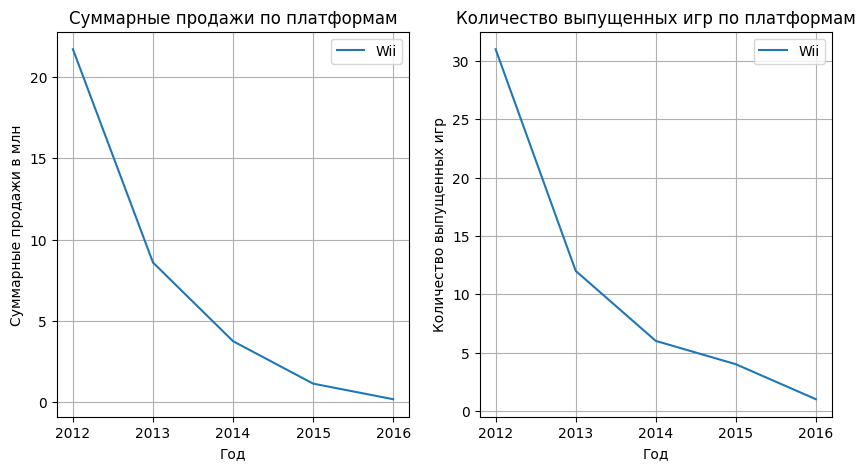

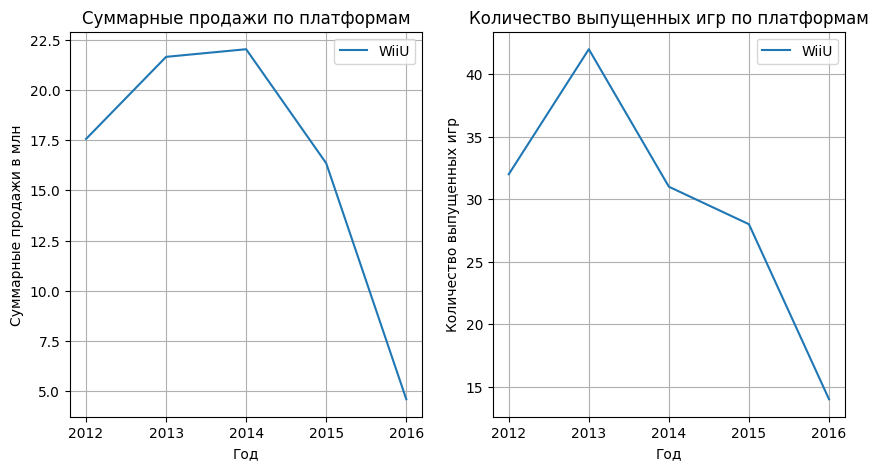

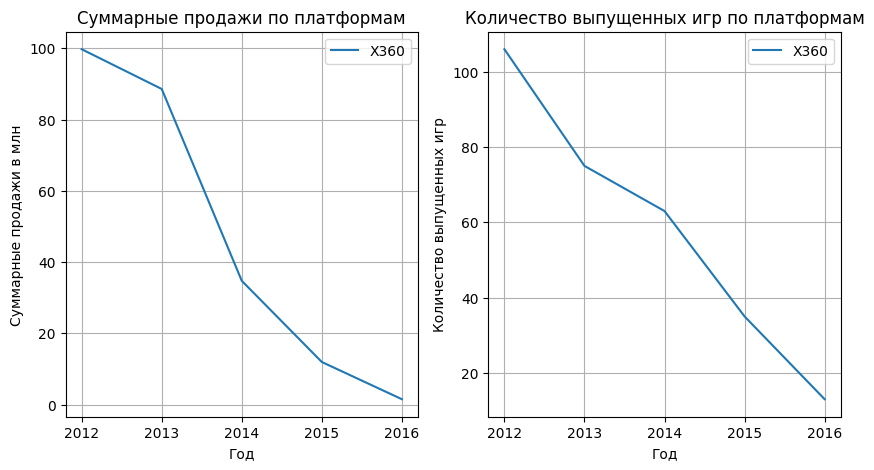

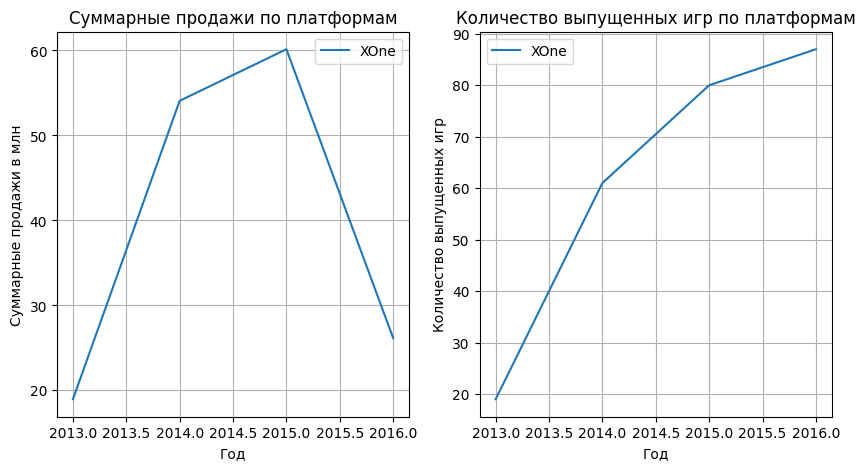

In [29]:
for name_platform in sales_by_platform_by_year.index.unique():
  b = sales_by_platform_by_year.query('platform == @name_platform')
  ax = plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.plot(b['year_of_release'], b['total_sales'], label=name_platform)
  plt.legend()
  plt.xlabel('Год')
  plt.ylabel('Суммарные продажи в млн')
  plt.title('Суммарные продажи по платформам')
  plt.grid()
  plt.subplot(1,2,2)
  plt.plot(b['year_of_release'], b['total_games_released'], label=name_platform)
  plt.legend()
  plt.xlabel('Год')
  plt.ylabel('Количество выпущенных игр')
  plt.title('Количество выпущенных игр по платформам')
  plt.grid()
  plt.show()

Нет ни одной растущей платформы по суммарным продажам, это объясняется общим трендом.

XOne и PS4 являются активно растущими платформами по количеству выпущенных игр. Их можно считать потенциально прибыльными. Также PC растёт по выпущенным играм последние 3 года, что может свидетельствовать о возможной прибыльности.



In [30]:
good_data = good_data.query('not(platform in ("DS", "PSP"))')

<h3>Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.</h3>

В переменной `percpective_platforms` оставим срез данных только с платформами `XOne`, `PS4`.

In [31]:
percpective_platforms = good_data.query('platform in ("XOne", "PS4")')

<h3>Посмотрим на выбросы в разбивке по платформам.</h3>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


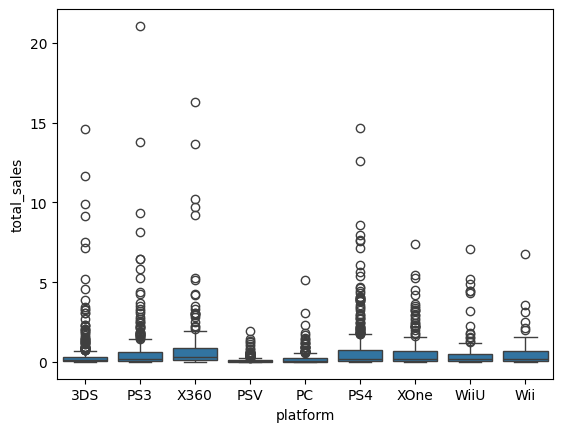

In [32]:
sns.boxplot(data=good_data,x='platform',y='total_sales')
plt.show()

Выбросов достаточно много, они объясняются популярными играми.

<h3>Посмотрим, как отзывы пользователей и критиков влияют на продажи внутри популярной платформы.<h3>

Оставим только данные без пропусков.

In [33]:
PS4_data = good_data.query('user_score>-1 and critic_score>-1 and platform=="PS4"')[['user_score','critic_score','total_sales']]
PS4_data

,user_score,critic_score,total_sales
109,5.9,45.0,0.14
246,7.8,57.0,0.02
260,6.2,67.0,0.02
351,8.1,79.0,1.12
470,2.0,47.0,0.22
...,...,...,...
16279,8.3,77.0,0.34
16325,7.6,78.0,0.03
16387,8.0,88.0,0.14
16633,6.8,62.0,0.20


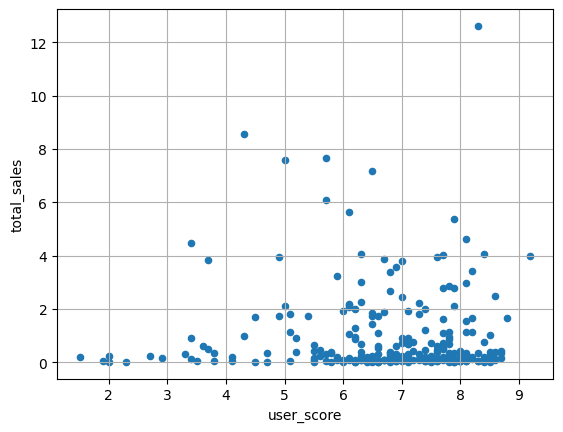

In [34]:
PS4_data.plot(kind='scatter', x='user_score',y='total_sales')
plt.grid()
plt.show()

Основная масса сосредоточена до 5 млн продаж и с оценкой пользователей от 5 до 9. Есть достаточное количество выбросов, игра может иметь успех вне зависимости от оценки пользователей.

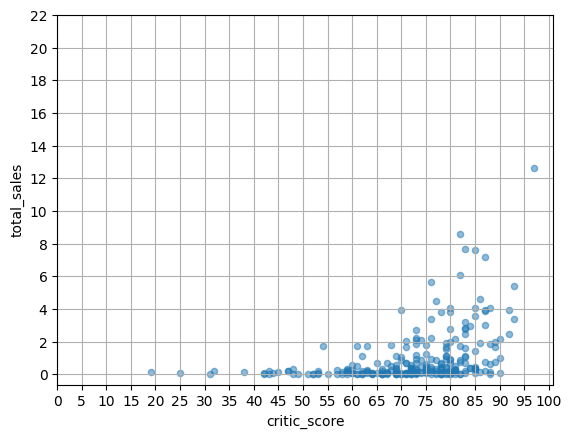

In [35]:
PS4_data.plot(kind='scatter', x='critic_score',y='total_sales', alpha=0.5)
plt.xticks(range(0,105,5))
plt.yticks(range(0,24,2))
plt.grid()
plt.show()

Все выбросы по количеству продаж сосредоточены в правой части графика, что означает высокую оценку критиков, то есть все игры, которые имели успех, были высоко оценены критиками. Все игры с общим количеством продаж более 2 млн имели оценку от 70 и выше.

При этом, много игр, имеющих высокий рейтинг популярными не стали.

In [36]:
PS4_data.corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.557654,-0.033625
critic_score,0.557654,1.000000,0.405895
total_sales,-0.033625,0.405895,1.000000


Таблица корреляций подтверждает наши выводы:

На продажи игр внутри одной платформы рейтинг пользователей не оказывает никакого влияния, а влияние рейтинга критиков продажи игр умеренное. Все успешные игры имеют высокие оценки критиков.



<h3>Вывод:</h3>
Прислушивать к мнению пользователей нецелесообразно, это никак не влияет на успех игры, а вот к мнению критиков прислушаться стоит - если рейтинг игры менее 70, то игра практически не имеет шансов на успех.

<h3>Проверим наши выводы на других платформах</h3>

In [37]:
XOne = good_data.query('user_score>-1 and critic_score>-1 and platform=="XOne"')[['user_score','critic_score','total_sales']]
XOne

,user_score,critic_score,total_sales
110,5.2,35.0,0.05
261,7.5,66.0,0.01
353,7.8,78.0,0.50
475,6.9,53.0,0.17
690,6.1,78.0,1.29
...,...,...,...
16173,8.0,75.0,0.15
16326,8.1,75.0,0.01
16388,8.1,87.0,0.04
16634,7.2,62.0,0.11


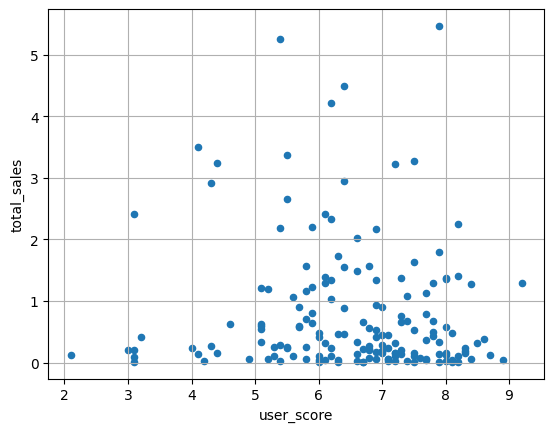

In [38]:
XOne.plot(kind='scatter', x='user_score',y='total_sales')
plt.grid()
plt.show()

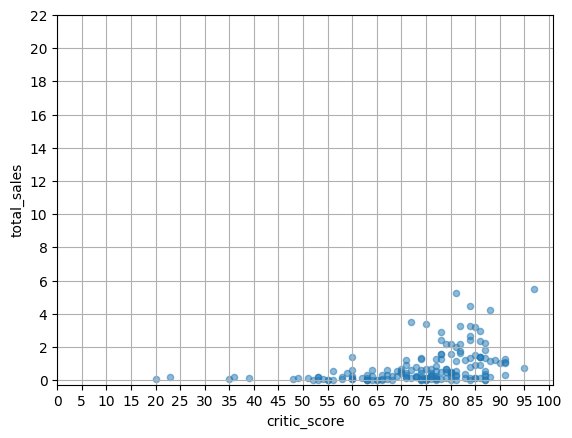

In [39]:
XOne.plot(kind='scatter', x='critic_score',y='total_sales', alpha=0.5)
plt.xticks(range(0,105,5))
plt.yticks(range(0,24,2))
plt.grid()
plt.show()

In [40]:
XOne.corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.472462,-0.094003
critic_score,0.472462,1.000000,0.410422
total_sales,-0.094003,0.410422,1.000000


Наши выводы подтвердились, будем смотреть только на оценку критиков.

<h3>Посмотрим на общее распределение игр по жанрам. Найдём самые прибыльные жанры</h3>

In [41]:
good_data.groupby(by=['genre'])['total_sales'].sum().sort_values(ascending=False)

,total_sales
genre,
Action,435.54
Shooter,304.73
Role-Playing,180.91
Sports,179.55
Misc,84.15
Platform,60.31
Racing,53.50
Fighting,44.13
Simulation,34.85


Самые прибыльные жанры игр - `Action`, `Shooter`,`Role-Playing` и `Sports`. Наименее востребованы: `Strategy` и `Puzzle`.

Проверим выводы на перспективных консолях:

In [42]:
percpective_platforms.groupby(by=['genre'])['total_sales'].sum().sort_values(ascending=False)

,total_sales
genre,
Shooter,148.89
Action,133.41
Sports,82.35
Role-Playing,39.54
Racing,21.93
Misc,15.62
Fighting,11.10
Adventure,9.02
Platform,8.62


Общая картина остаётся неизменной, но жанр `Role-Playing` сильно потерял позиции, а лидерские позиции занимает жанр `Shooter`.

#Шаг 4. Составим портрет пользователя каждого региона


<h3>Самые популярные платформы:</h3>

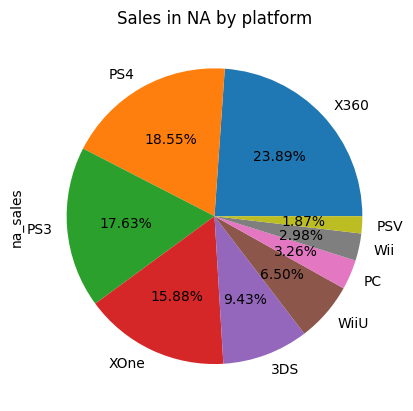

In [43]:
(good_data
 .pivot_table(index=['platform'],aggfunc={'na_sales':'sum'})
 .sort_values(by='na_sales',ascending=False)
 .plot(kind='pie', y='na_sales', autopct='%1.2f%%', legend=False) )
plt.title('Sales in NA by platform')
plt.show()

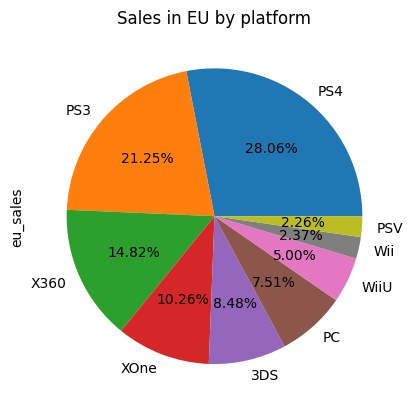

In [44]:
(good_data
 .pivot_table(index=['platform'],aggfunc={'eu_sales':'sum'})
 .sort_values(by='eu_sales',ascending=False)
 .plot(kind='pie', y='eu_sales', autopct='%1.2f%%', legend=False))
plt.title('Sales in EU by platform')
plt.show()

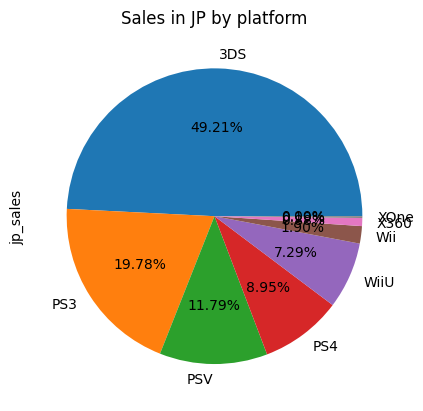

In [45]:
(good_data
.pivot_table(index=['platform'],aggfunc={'jp_sales':'sum'})
.sort_values(by='jp_sales',ascending=False)
.plot(kind='pie', y='jp_sales', autopct='%1.2f%%', legend=False) )
plt.title('Sales in JP by platform')
plt.show()

<h3>Вывод:</h3>

* В NA доминирует <code>X360</code>, в EU - <code>PS4</code>, а в JP <code>3DS</code>.
* В Японии практически половину рынка занимает <code>3DS</code>, а Европе и Северной Америке, эта платформа занимает менее 10% рынка.
* В Европе и Северной Америке Xbox360 и XOne входят в топ-5 консолей, а в Японии находится в самом конце списка.
* В Европе самый высокий процент PC игр.


<h3>Самые популярные жанры:</h3>

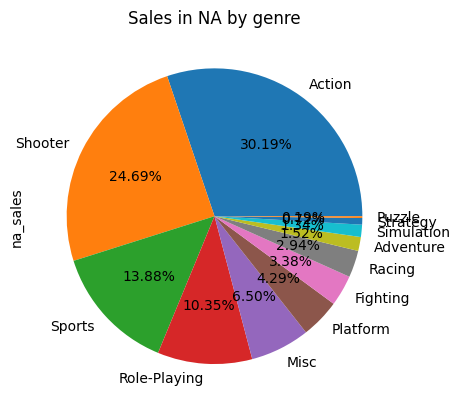

In [46]:
(good_data
 .pivot_table(index=['genre'],aggfunc={'na_sales':'sum'})
 .sort_values(by='na_sales',ascending=False)
 .plot(kind='pie', y='na_sales', autopct='%1.2f%%', legend=False) )
plt.title('Sales in NA by genre')
plt.show()

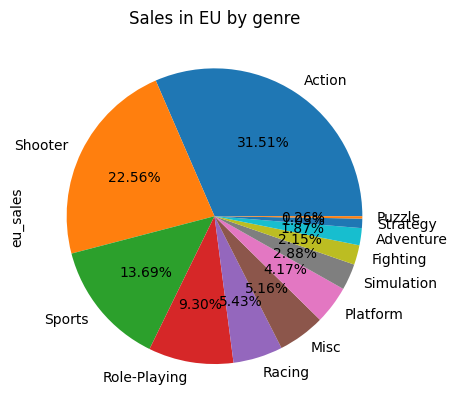

In [47]:
(good_data
 .pivot_table(index=['genre'],aggfunc={'eu_sales':'sum'})
 .sort_values(by='eu_sales',ascending=False)
 .plot(kind='pie', y='eu_sales', autopct='%1.2f%%', legend=False) )
plt.title('Sales in EU by genre')
plt.show()

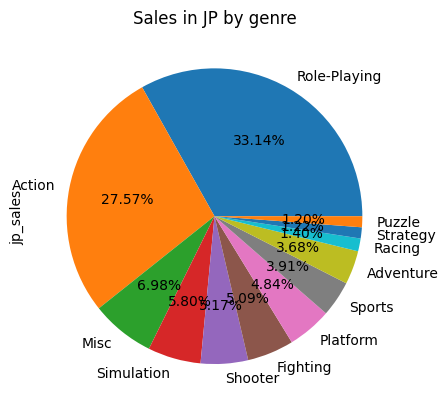

In [48]:
(good_data
 .pivot_table(index=['genre'],aggfunc={'jp_sales':'sum'})
 .sort_values(by='jp_sales',ascending=False)
 .plot(kind='pie', y='jp_sales', autopct='%1.2f%%', legend=False) )
plt.title('Sales in JP by genre')
plt.show()

<h3> Выводы:</h3>

* Наиболее популярным жанром в Европе и Северной Америке является экшен `Action`. В Японии - `Role-Playing` .
* В Японии процент шутеров `shooters` в 5 раза меньше, чем в Европе и Северной Америке.
* В Японии спорт `Sports` является непопурным жанром, в то время, как в Европе и Северной Америке он входит в топ 3 по популярности.
* В Японии жанр `Role-Playing` является самым популярным. В европе и Северной Америке его процент в 3 раза меньше.
* `Strategy` и `Puzzle`  замыкают список жанров по популярности во всех странах.

Невооруженным взгядом заметна разница между японским рынком с европейским и американским. Такую разницу можно объяснить внешними факторами: разницей культур и ценностей.


<h3>Проверим влияние рейтинга ESRB на продажи в каждом регионе:</h3>

In [49]:
(good_data
 .query('rating!="NS"')
 .pivot_table(index=['rating'], aggfunc={'na_sales':'sum','eu_sales':'sum','jp_sales':'sum','total_sales':'sum'})
 .sort_values(by='total_sales', ascending=False) )

,eu_sales,jp_sales,na_sales,total_sales
rating,,,,
M,193.96,21.20,231.57,510.11
E,111.79,27.62,113.44,283.98
T,52.96,25.76,66.02,162.68
E10+,54.84,8.19,75.09,154.25


Заметим, что от рейтинга ESRB зависят продажи:

* В Европе и Америке иерархия такая:
    *  M («M» («Mature») — «От 17 лет»)
    *  E («E» («Everyone») — «Для всех»)
    *  E10+ («E10+» («Everyone 10 and older») — «Для всех старше 10 лет»)
    *  T («T» («Teen») — «Подросткам 13–19 лет»)
* В Японии:
    * E («E» («Everyone») — «Для всех»)
    * T («T» («Teen») — «Подросткам 13–19 лет»)
    * M («M» («Mature») — «От 17 лет»)
    * E10+  E10+ («E10+» («Everyone 10 and older») — «Для всех старше 10 лет»)

<h2>Портрет пользователя:</h2>

Северная Америка:
* Платформа - X360, иногда PS4.
* Жанр - `Action` или `Shooter`
* Рейтинг игр от ESRB: `M` - от 17 лет
  
Европа:
* Платформа - PS4, иногда PS3.
* Жанр - `Action` или `Shooter`
* Рейтинг игр от ESRB: `M` - от 17 лет
  
Япония:
* Платформа - PS3 или 3DS.
* Жанр - `Action` или `Role-Playing`
* Рейтинг игр от ESRB: `E` - для всех или `T` подросткам 13-19 лет.
  
<h2>Общий вывод по регионам:</h2>
В Европе и Северной Америке предпочтения пользователи очень похожи и сильно отличаются от предпочтений японских пользователей. При этом размеры игровых рынков Европы и Северной Америки много больше размеров японского рынка.

Имеет смысл ориентироваться на "западный" рынок.

# Шаг 5. Проверка гипотез

<h3>Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</h3>

В переменную `XOne` запишем пользовательские рейтинги платформы `Xbox One`, а в переменную `PC` запишем пользовательские рейтинги платформы `PC`.

In [50]:
PC_user_score = good_data.query('platform=="PC" and user_score>-1')['user_score']
XOne_user_score = good_data.query('platform=="XOne" and user_score>-1')['user_score']

Примем уровернь значимости 5% (`alpha = 0.05`).

Будем проверять двухвыборочным t-testом с независимыми выборками.

Нулевая гипотеза - средние значения пользовательских рейтингов двух платформ равны.

Альтернативная гипотеза - средние значения пользовательских рейтингов двух платформ не равны.

In [51]:
alpha = 0.05
result = st.ttest_ind(XOne_user_score,PC_user_score)
p_val = result.pvalue
print('p-значение:', p_val)
if p_val<alpha:
    print('Гипотеза опроверглась')
else:
    print('Гипотезу опровергнуть не получилось')

p-значение: 0.5535080500643738
Гипотезу опровергнуть не получилось


Гипотеза не опроверглась, p-значение очень велико.

С большой долей вероятности средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

<h3>Гипотеза 2.Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.</h3>

В переменную `XOne` запишем пользовательские рейтинги платформы `Xbox One`, а в переменную `PC` запишем пользовательские рейтинги платформы `PC`.

In [52]:
Action_user_score = good_data.query('genre=="Action" and user_score>-1')['user_score']
Sports_user_score = good_data.query('genre=="Sports" and user_score>-1')['user_score']

Примем уровернь значимости 5% (`alpha = 0.05`).

Будем проверять двухвыборочным t-testом с независимыми выборками.

Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports равны.

Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports не равны.

In [53]:
alpha = 0.05
result = st.ttest_ind(Action_user_score,Sports_user_score)
p_val = result.pvalue
print('p-значение:', p_val)
if p_val<alpha:
    print('Гипотеза опроверглась')
else:
    print('Гипотезу опровергнуть не получилось')

p-значение: 4.7312721993362015e-26
Гипотеза опроверглась


Гипотеза опроверглась, p-значение очень мало.

С большой долей вероятности средние пользовательские рейтинги жанров `Action` и `Sports` разные.

# Шаг 6. Общий вывод

* Можно заметить, что практически все попуряные платформы 21 века имеют одинаковые стадии популярности:
  * Появление на рынке,
  * Резкий взлёт,
  * Пик через 5 лет, после появления,
  * Падение,
  * Прекращение выпуска и продажи игр на данной платформе - через 10 лет, после появления.
* Для построения прогноза на 2017 год необходимо анализировать данные не раньше 2012 года.
* Наиболее популярные платформы на текущий момент - `PS3` и `PS4`, а самые перспективные - `PS4` и `Xbox One`.
* Наиболее популярный жанр современных игр - `Action`.
* Наиболее прибыльны игры с возрастным ограничением от 17 лет.
* Средний портрет пользователя:
  * Северная Америка:
    * Платформа - X360, иногда PS3.
    * Жанр - Action или Shooter
    * Рейтинг игр от ESRB: M - от 17 лет
  * Европа:
    * Платформа - PS4, иногда PS3.
    * Жанр - Action или Shooter
    * Рейтинг игр от ESRB: M - от 17 лет
  * Япония:
    * Платформа - 3DS.
    * Жанр - Action или Role-Playing
    * Рейтинг игр от ESRB: E - для всех или T подросткам 13-19 лет.
* Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые.
* Средние пользовательские рейтинги жанров `Action` и `Sports`  разные.
* В Европе и Северной Америке предпочтения пользователи очень похожи и сильно отличаются от предпочтений японских пользователей. При этом размеры игровых рынков Европы и Северной Америки много больше размеров японского рынка. При ограниченности ресурсов имеет смысл ориентироваться на "западный" рынок.
* Прислушиваться к мнению пользователей нецелесообразно, это никак не влияет на успех игры.
* Успех игры зависит от рейтинга критиков - если рейтинг игры менее 70, то игра практически не имеет шансов на успех.

<h1>Предложение по рекламной кампании:</h1>  

* На рынках Европы и Северной Америки рекламировать игры на платформах `PS4` и `Xbox One` в жанрах `Action` и  `Shooter`, рассчитанные на возрастную категорию от 17 лет.
* На рынке Японии имеет смысл рекламировать игры на платформе `DS3` в жанре `Role-Playing` с возрастными категорией для всех или для подростков.